## Data Collection & Preprocessing

### Install Libraries

In [1]:
#!pip install yfinance pandas fredapi

### Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt

#Initialize FRED API (get free API key: https://fred.stlouisfed.org/docs/api/api_key.html)
fred = Fred(api_key="854f00b7d1dc742e9691581630452979")

### Fetch QQQ Data

In [3]:
# Define parameters
ticker = "QQQ"
start_date = "2010-01-01"
end_date = "2025-4-3"

# Fetch historical data (adjusted for splits/dividends)
qqq = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
qqq.to_csv("QQQ_Raw_Data.csv")
print("Raw Data Head:")
display(qqq.head())

[*********************100%***********************]  1 of 1 completed

Raw Data Head:


Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2010-01-04,40.485802,40.546856,40.354979,40.407310,62822800
2010-01-05,40.485802,40.555576,40.259041,40.459638,62935600
2010-01-06,40.241611,40.599198,40.180560,40.468376,96033000
2010-01-07,40.267773,40.354991,40.049732,40.302660,77094100
2010-01-08,40.599194,40.599194,40.058453,40.180556,88886600


In [4]:
# Load data, skip initial rows if headers are misaligned
df = pd.read_csv("QQQ_Raw_Data.csv", skiprows=2)

# Display raw data
print("Raw Data:")
display(df.head())

Raw Data:


,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2010-01-04,40.485802,40.546856,40.354979,40.407310,62822800
1,2010-01-05,40.485802,40.555576,40.259041,40.459638,62935600
2,2010-01-06,40.241611,40.599198,40.180560,40.468376,96033000
3,2010-01-07,40.267773,40.354991,40.049732,40.302660,77094100
4,2010-01-08,40.599194,40.599194,40.058453,40.180556,88886600


In [5]:
# Rename columns (6 columns total)
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Reorder columns to standard format
df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]

# Display cleaned data
print("\nCleaned Data:")
display(df.head())


Cleaned Data:


,Date,Open,High,Low,Close,Volume
0,2010-01-04,40.407310,40.546856,40.354979,40.485802,62822800
1,2010-01-05,40.459638,40.555576,40.259041,40.485802,62935600
2,2010-01-06,40.468376,40.599198,40.180560,40.241611,96033000
3,2010-01-07,40.302660,40.354991,40.049732,40.267773,77094100
4,2010-01-08,40.180556,40.599194,40.058453,40.599194,88886600


### Add Macroeconomic & Sector Features

In [6]:
# 1. 10-Year Treasury Yield (macroeconomic indicator)
qqq["10Y_Yield"] = fred.get_series("DGS10", observation_start=start_date, observation_end=end_date)

# 2. Semiconductor Sector ETF (SOXX) for sector-specific trends
soxx = yf.download("SOXX", start=start_date, end=end_date, auto_adjust=True)["Close"]
qqq["SOXX_Close"] = soxx

# 3. VIX Volatility Index
vix = yf.download("^VIX", start=start_date, end=end_date)["Close"]
qqq["VIX"] = vix

# Forward-fill missing macroeconomic data
qqq.ffill(inplace=True)

[*********************100%***********************]  1 of 1 completed


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


###  Validate and Save Data

In [7]:
qqq.to_csv("QQQ_Raw_Data2.csv")
print("Raw Data Head:")
display(qqq.head())

Raw Data Head:


Price,Close,High,Low,Open,Volume,10Y_Yield,SOXX_Close,VIX
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ,,,
Date,,,,,,,,
2010-01-04,40.485802,40.546856,40.354979,40.407310,62822800,3.85,14.099307,20.040001
2010-01-05,40.485802,40.555576,40.259041,40.459638,62935600,3.77,14.076670,19.350000
2010-01-06,40.241611,40.599198,40.180560,40.468376,96033000,3.85,14.034235,19.160000
2010-01-07,40.267773,40.354991,40.049732,40.302660,77094100,3.85,13.923882,19.059999
2010-01-08,40.599194,40.599194,40.058453,40.180556,88886600,3.83,14.133262,18.129999


In [8]:
df = pd.read_csv("QQQ_Raw_Data2.csv", skiprows=2)

# Display raw data
print("Raw Data:")
display(df.head())

Raw Data:


,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2010-01-04,40.485802,40.546856,40.354979,40.407310,62822800,3.85,14.099307,20.040001
1,2010-01-05,40.485802,40.555576,40.259041,40.459638,62935600,3.77,14.076670,19.350000
2,2010-01-06,40.241611,40.599198,40.180560,40.468376,96033000,3.85,14.034235,19.160000
3,2010-01-07,40.267773,40.354991,40.049732,40.302660,77094100,3.85,13.923882,19.059999
4,2010-01-08,40.599194,40.599194,40.058453,40.180556,88886600,3.83,14.133262,18.129999


In [9]:
# Rename columns (6 columns total)
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume","10Y_Yield","SOXX_Close","VIX"]

# Reorder columns to standard format
df = df[["Date", "Open", "High", "Low", "Close", "Volume","10Y_Yield","SOXX_Close","VIX"]]

# Display cleaned data
print("\nCleaned Data:")
display(df.head())


Cleaned Data:


,Date,Open,High,Low,Close,Volume,10Y_Yield,SOXX_Close,VIX
0,2010-01-04,40.407310,40.546856,40.354979,40.485802,62822800,3.85,14.099307,20.040001
1,2010-01-05,40.459638,40.555576,40.259041,40.485802,62935600,3.77,14.076670,19.350000
2,2010-01-06,40.468376,40.599198,40.180560,40.241611,96033000,3.85,14.034235,19.160000
3,2010-01-07,40.302660,40.354991,40.049732,40.267773,77094100,3.85,13.923882,19.059999
4,2010-01-08,40.180556,40.599194,40.058453,40.599194,88886600,3.83,14.133262,18.129999


In [10]:
# Convert "Date" to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d")  # Use format="%m/%d/%Y" if dates are MM/DD/YYYY

# Sort by date (oldest to newest)
df = df.sort_values("Date")

# Display final data
print("\nFinal Data with Corrected Dates:")
display(df.head())


Final Data with Corrected Dates:


,Date,Open,High,Low,Close,Volume,10Y_Yield,SOXX_Close,VIX
0,2010-01-04,40.407310,40.546856,40.354979,40.485802,62822800,3.85,14.099307,20.040001
1,2010-01-05,40.459638,40.555576,40.259041,40.485802,62935600,3.77,14.076670,19.350000
2,2010-01-06,40.468376,40.599198,40.180560,40.241611,96033000,3.85,14.034235,19.160000
3,2010-01-07,40.302660,40.354991,40.049732,40.267773,77094100,3.85,13.923882,19.059999
4,2010-01-08,40.180556,40.599194,40.058453,40.599194,88886600,3.83,14.133262,18.129999



Missing Values:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
10Y_Yield     0
SOXX_Close    0
VIX           0
dtype: int64


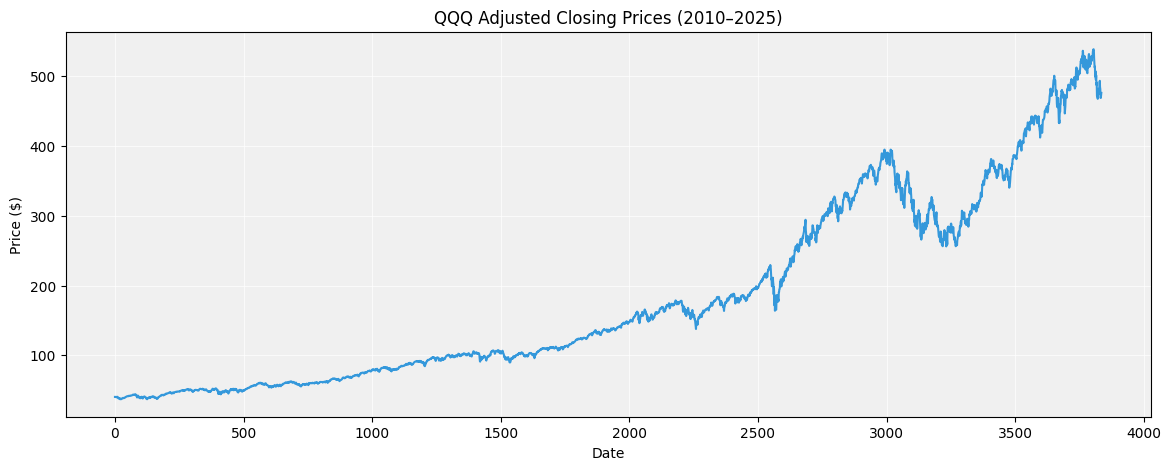

Data saved to QQQ_Clean_Data.csv


In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot closing prices for visual validation
plt.figure(figsize=(14, 5))
plt.plot(df["Close"], color="#3498db", linewidth=1.5)
plt.title("QQQ Adjusted Closing Prices (2010–2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True, color="white", linestyle="-", linewidth=0.5)
plt.gca().set_facecolor("#f0f0f0")
plt.show()

# Save cleaned data
df.to_csv("QQQ_Clean_Data.csv", index=False)
print("Data saved to QQQ_Clean_Data.csv")